### Coronavirus disease 2019 (COVID-19) is a contagious disease caused by a virus, the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in Wuhan, China, in December 2019.The disease spread worldwide, leading to the COVID-19 pandemic.

### Symptoms of COVID‑19 are variable, but often include fever, cough, headache, fatigue, breathing difficulties, loss of smell, and loss of taste. Symptoms may begin one to fourteen days after exposure to the virus. At least a third of people who are infected do not develop noticeable symptoms. Of those people who develop symptoms noticeable enough to be classed as patients, most (81%) develop mild to moderate symptoms (up to mild pneumonia), while 14% develop severe symptoms (dyspnea, hypoxia, or more than 50% lung involvement on imaging), and 5% suffer critical symptoms (respiratory failure, shock, or multiorgan dysfunction). Older people are at a higher risk of developing severe symptoms. Some people continue to experience a range of effects (long COVID) for months after recovery, and damage to organs has been observed. Multi-year studies are underway to further investigate the long-term effects of the disease.

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [4]:
train = pd.read_csv('/content/COVID-19 Coronavirus.csv',header=None)

In [36]:
train.rename(columns={0:'Country',
                      1:'Other names',
                      2:'ISO',
                      3:'Population',
                      4:'Continent',
                      5:'Total Cases',
                      6:'Total Deaths',
                      7:'TC1Mpop',
                      8:'TD1Mpop',
                      9:'Death percentage'},inplace=True)

In [6]:
train.drop(index=0,inplace=True)

In [7]:
train['Population']=train['Population'].map(int)
train['Total Cases']=train['Total Cases'].map(int)
train['Total Deaths']=train['Total Deaths'].map(int)
train['TC1Mpop']=train['TC1Mpop'].map(int)
train['TD1Mpop']=train['TD1Mpop'].map(int)
train['Death percentage']=train['Death percentage'].map(float)

In [8]:
train

,Country,Other names,ISO,Population,Continent,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
1,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
2,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
3,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
4,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
5,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...,...,...,...,...
221,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
222,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
223,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
224,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120


In [9]:
train.columns

Index(['Country', 'Other names', 'ISO', 'Population', 'Continent',
       'Total Cases', 'Total Deaths', 'TC1Mpop', 'TD1Mpop',
       'Death percentage'],
      dtype='object')

### Country (Other names, ISO) is a distinct territorial body or political entity.It may be an independent sovereign state or part of a larger state, as a non-sovereign or formerly sovereign political division, a physical territory with a government, or a geographic region associated with sets of previously independent or differently associated peoples with distinct political characteristics. It is not inherently sovereign.
### In demographics, the term population is often used to refer to the total number of humans currently living, and was estimated to have exceeded 7.9 billion as of November 2021. It took over two million years of human prehistory and history for the human population to reach one billion and only 200 years more to grow to 7 billion.
### A continent is any of several large landmasses. Generally identified by convention rather than any strict criteria, up to seven geographical regions are commonly regarded as continents. Ordered from largest in area to smallest, these seven regions are: Asia, Africa, North America, South America, Antarctica, Europe, and Australia. Our data includes continents such as Asia, Europe, Africa, Latin America and the Caribbean,Oceania, Northern America.
* Total cases - the number of infections in the country.

* Total deaths - the number of deaths in the selected country.

* Total Cases//1M pop (Tot Deaths//1M pop) - the number of deaths in the selected country per 1 million population.

* Death percentage - the percentage of deaths among the diseased population.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 1 to 225
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           225 non-null    object 
 1   Other names       224 non-null    object 
 2   ISO               225 non-null    object 
 3   Population        225 non-null    int64  
 4   Continent         225 non-null    object 
 5   Total Cases       225 non-null    int64  
 6   Total Deaths      225 non-null    int64  
 7   TC1Mpop           225 non-null    int64  
 8   TD1Mpop           225 non-null    int64  
 9   Death percentage  225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [11]:
train=train.drop(['Other names','ISO'],axis=1)

In [12]:
train.describe()

,Population,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


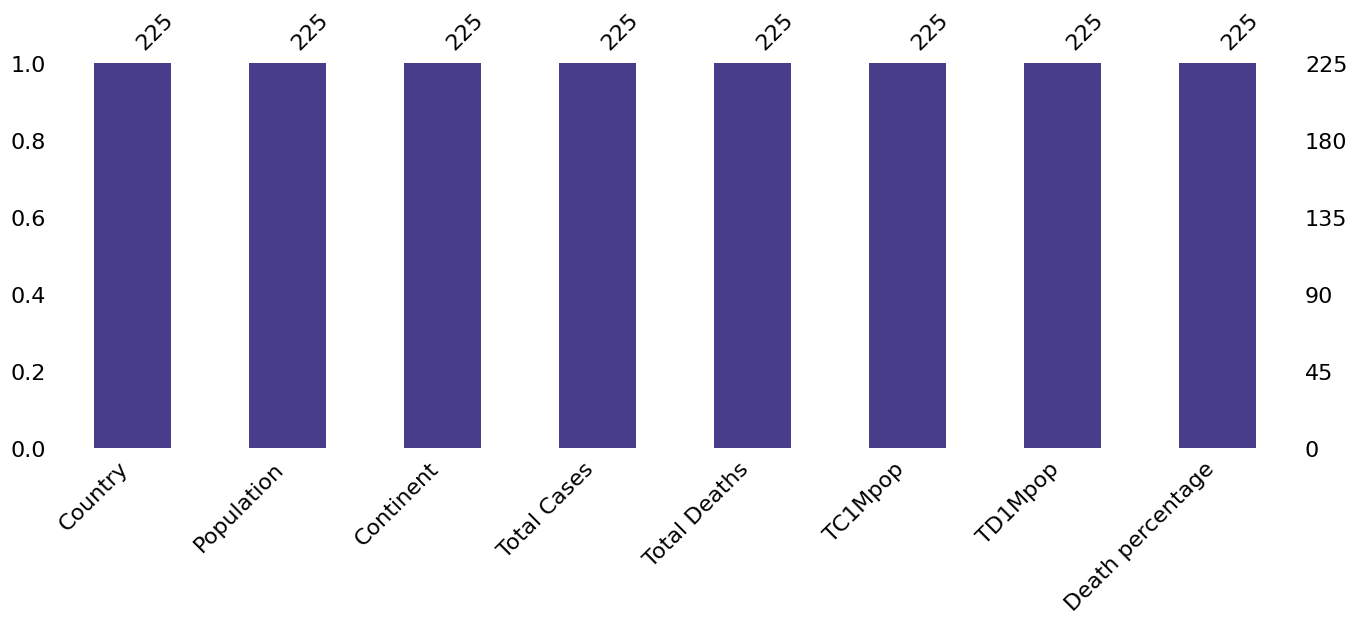

In [13]:
msno.bar(train, figsize = (16,5),color = "#483D8B")
plt.show()

In [14]:
train.isnull().sum()

Country             0
Population          0
Continent           0
Total Cases         0
Total Deaths        0
TC1Mpop             0
TD1Mpop             0
Death percentage    0
dtype: int64

In [15]:
train.columns

Index(['Country', 'Population', 'Continent', 'Total Cases', 'Total Deaths',
       'TC1Mpop', 'TD1Mpop', 'Death percentage'],
      dtype='object')

In [16]:
columns=['Population', 'Total Cases', 'Total Deaths',
       'TC1Mpop', 'TD1Mpop', 'Death percentage']

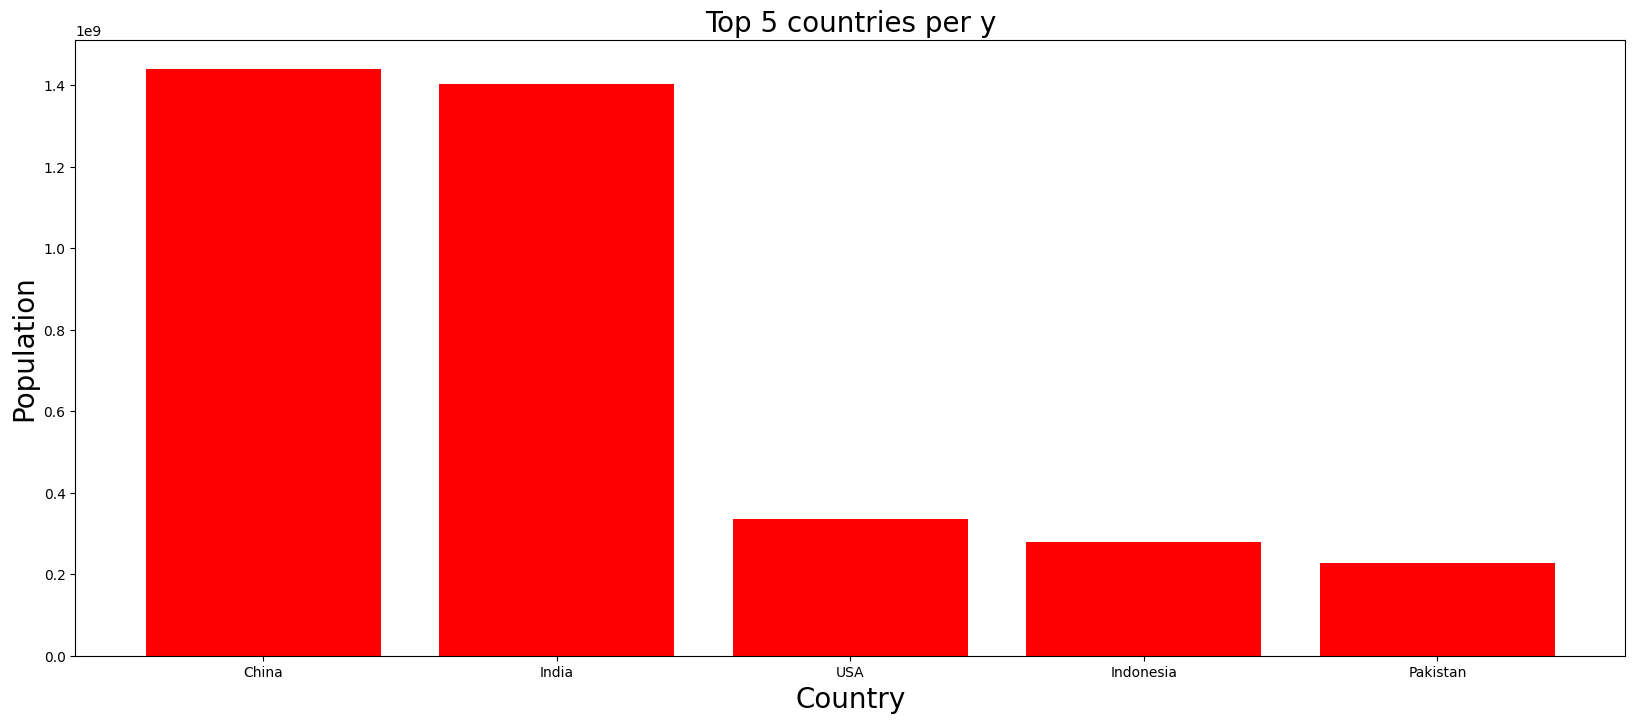

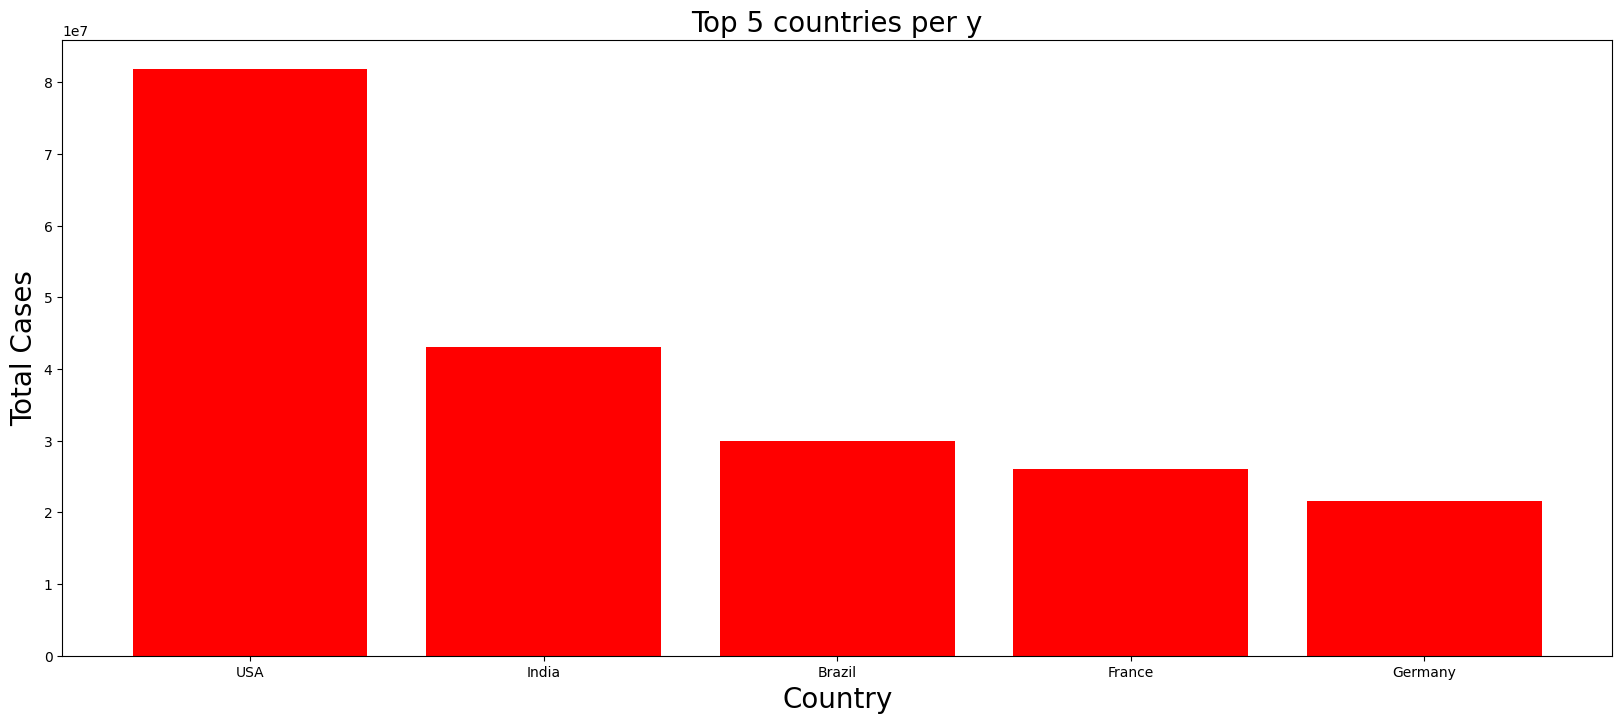

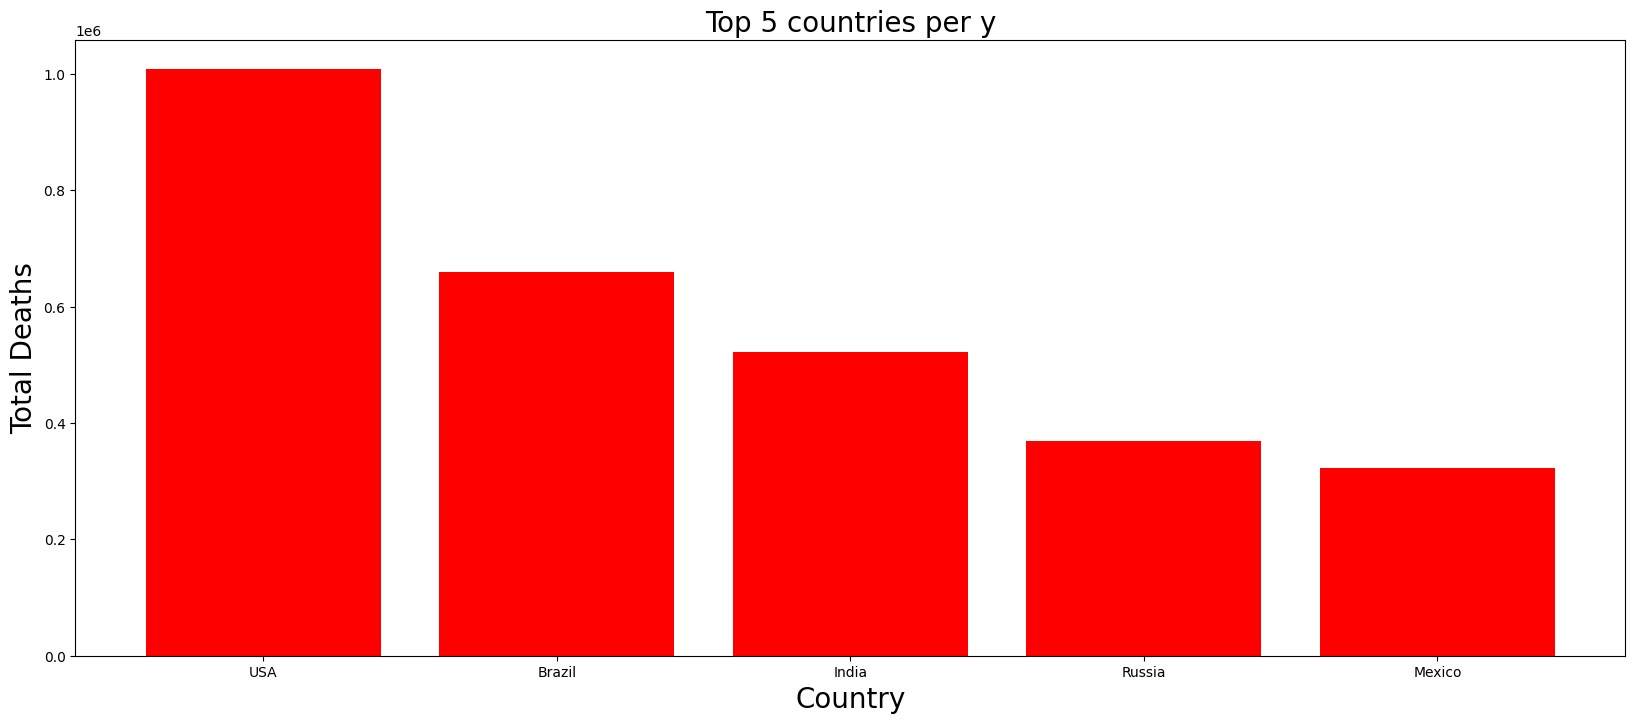

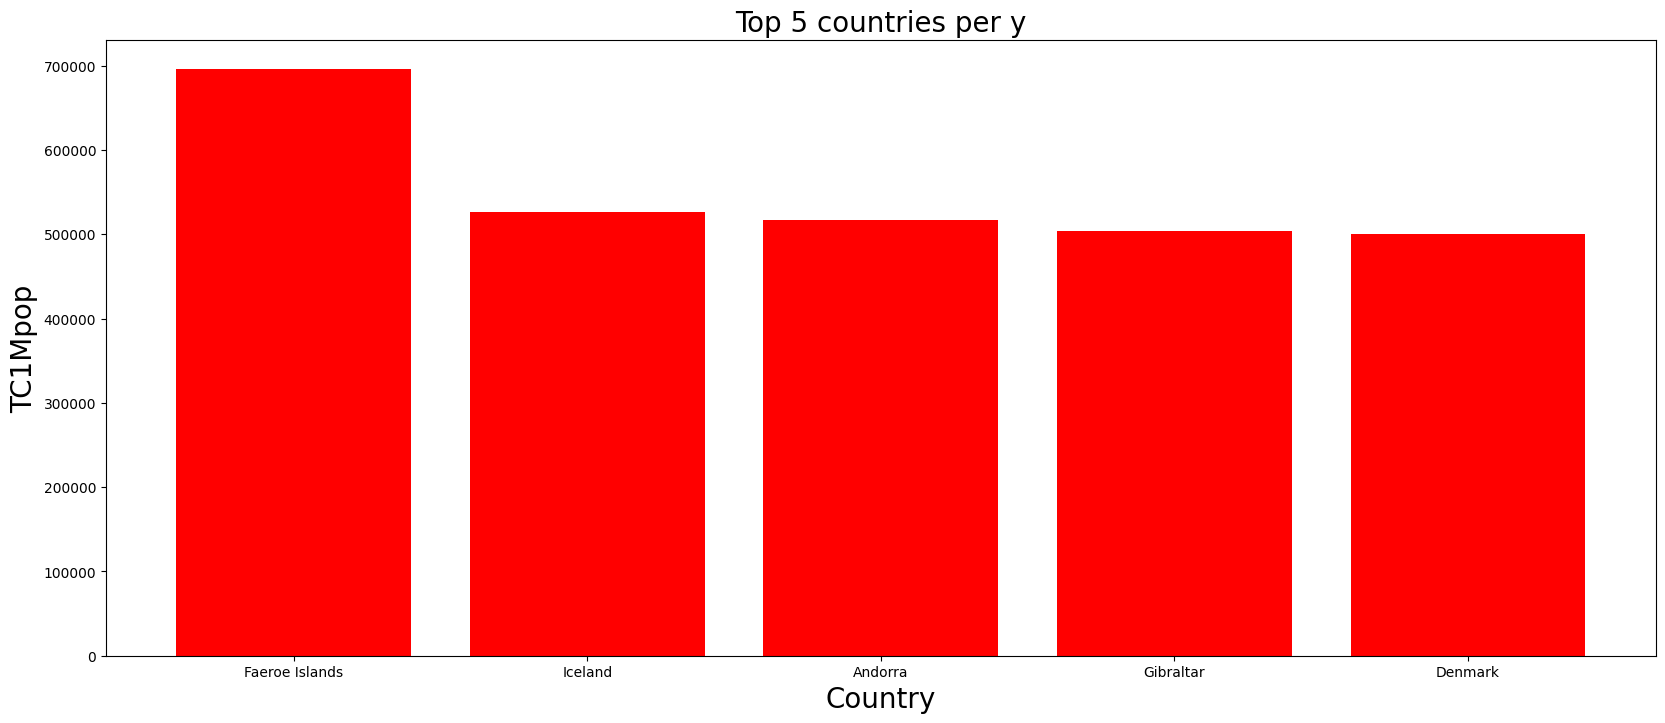

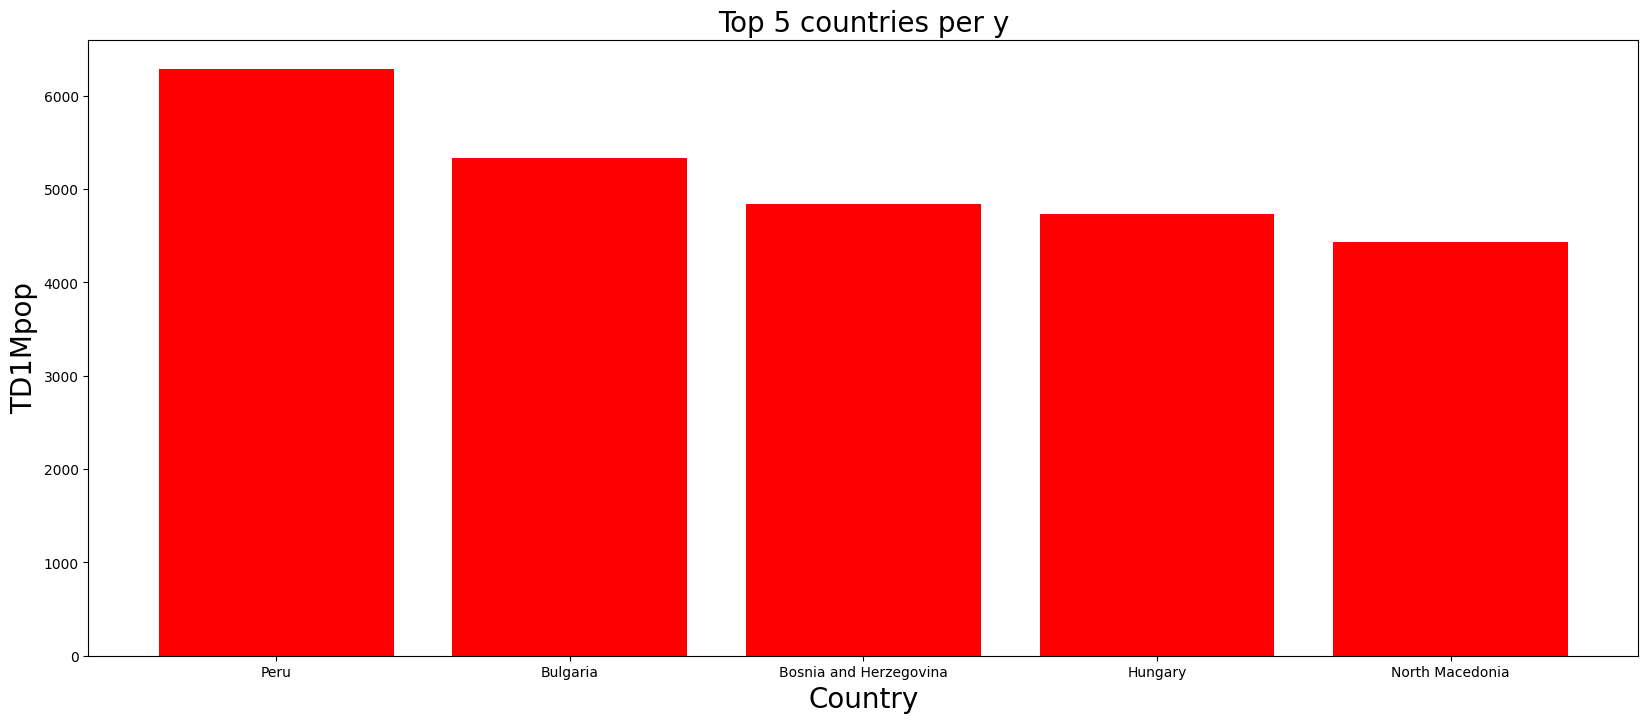

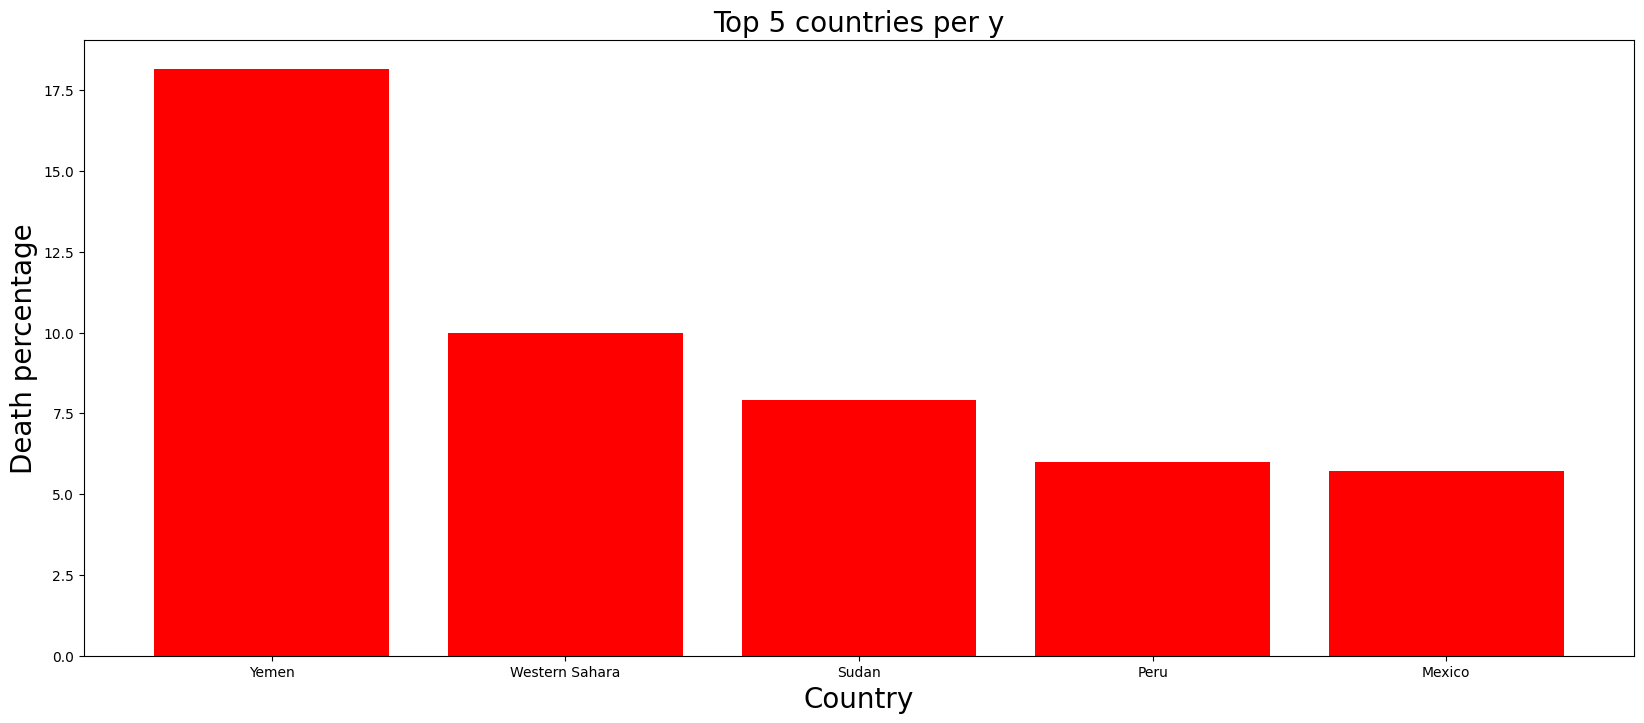

In [17]:
for column in columns:
  top5 = train.nlargest(5,column)
  plt.figure(figsize=(20,8))
  plt.bar(top5['Country'], top5[column],color='red',alpha=1)
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("Top 5 countries per y", fontsize = 20)
  plt.show()

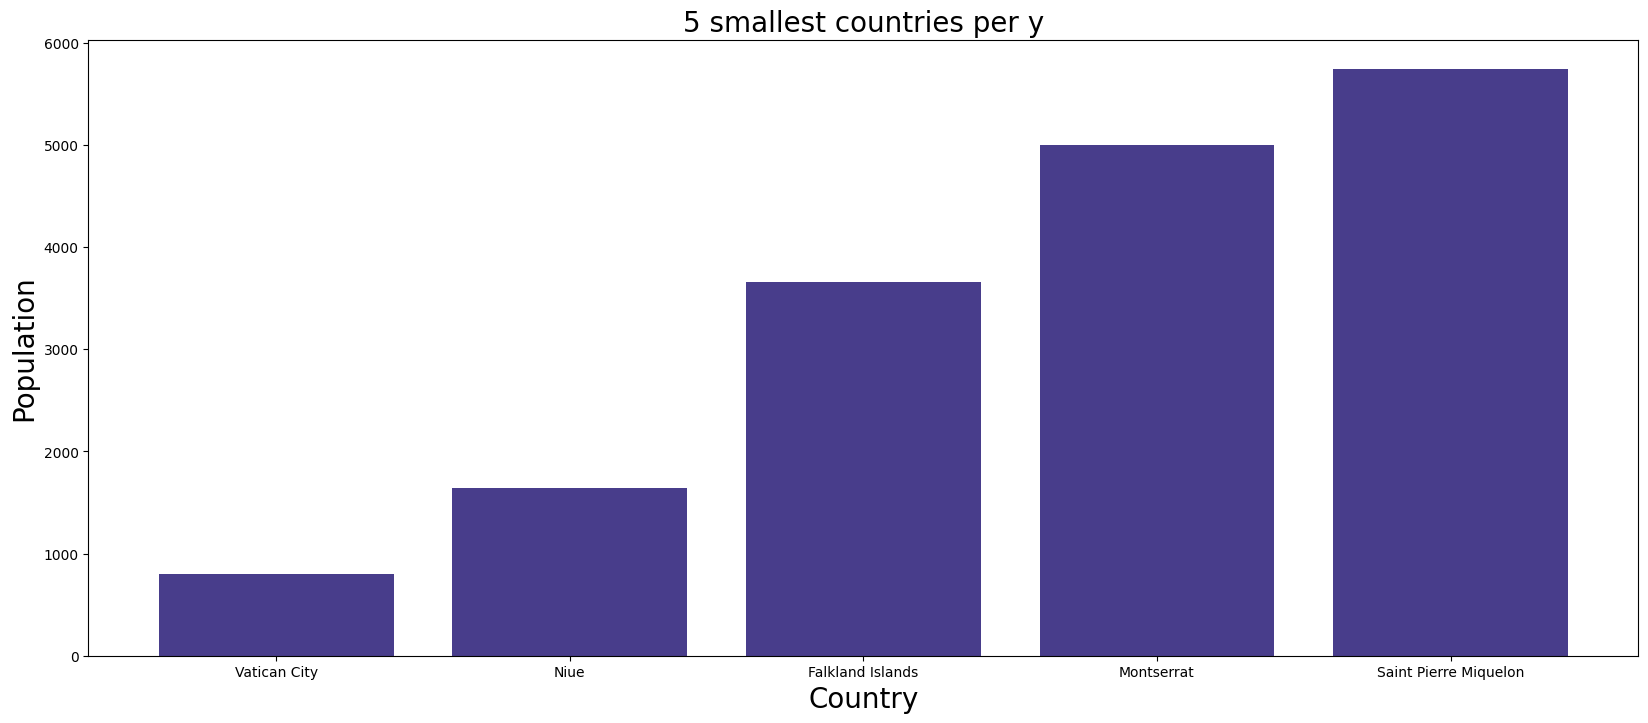

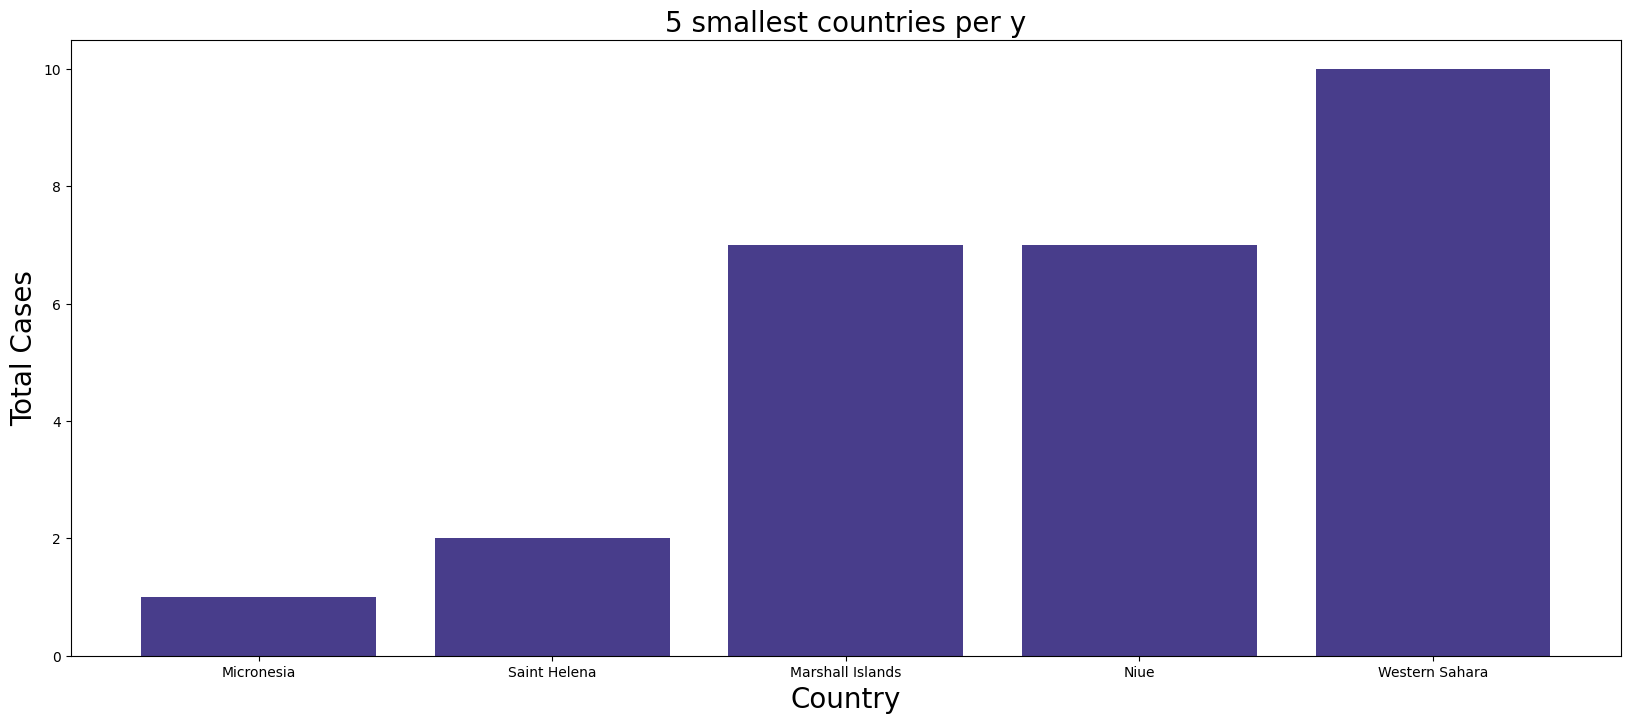

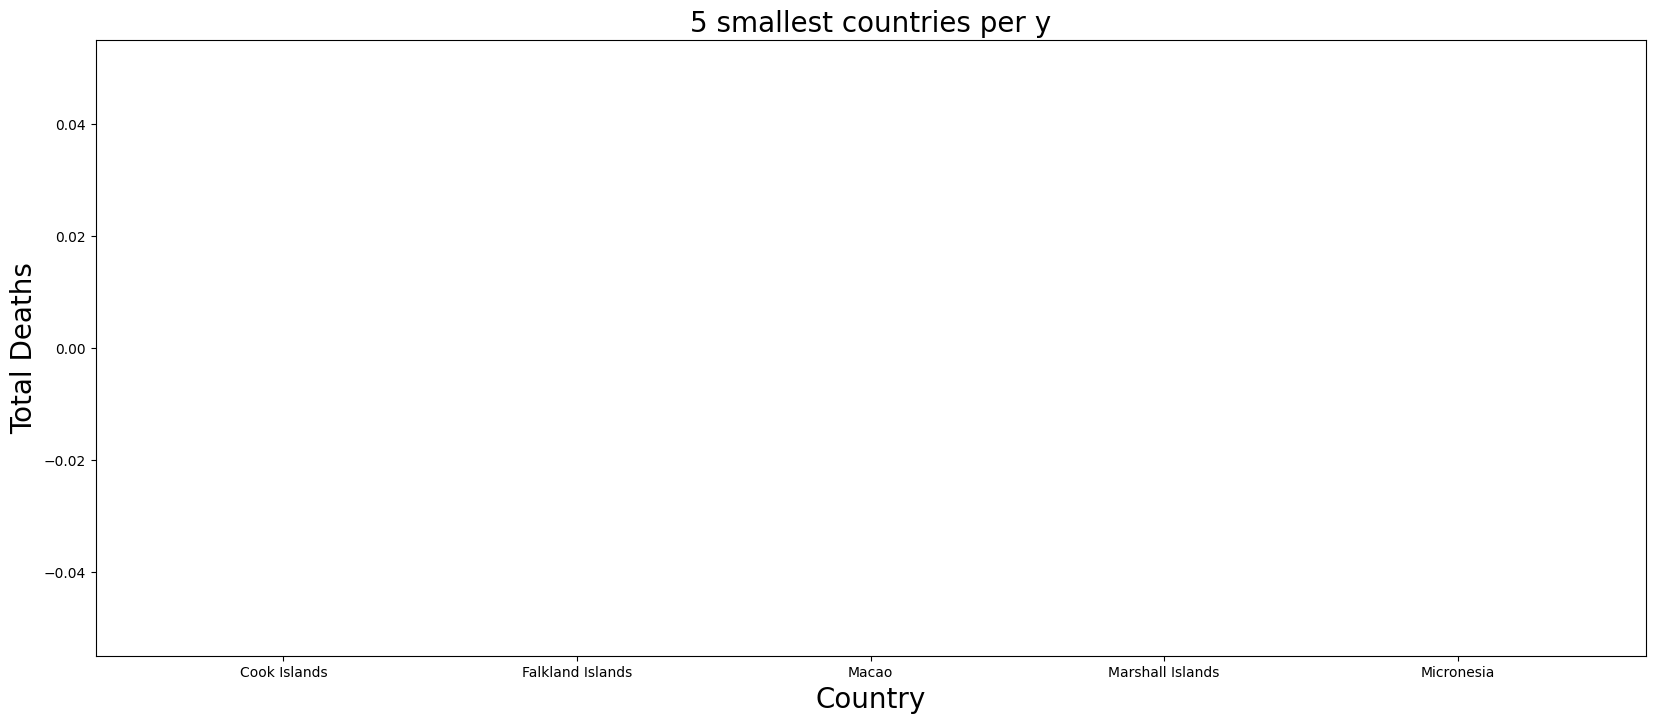

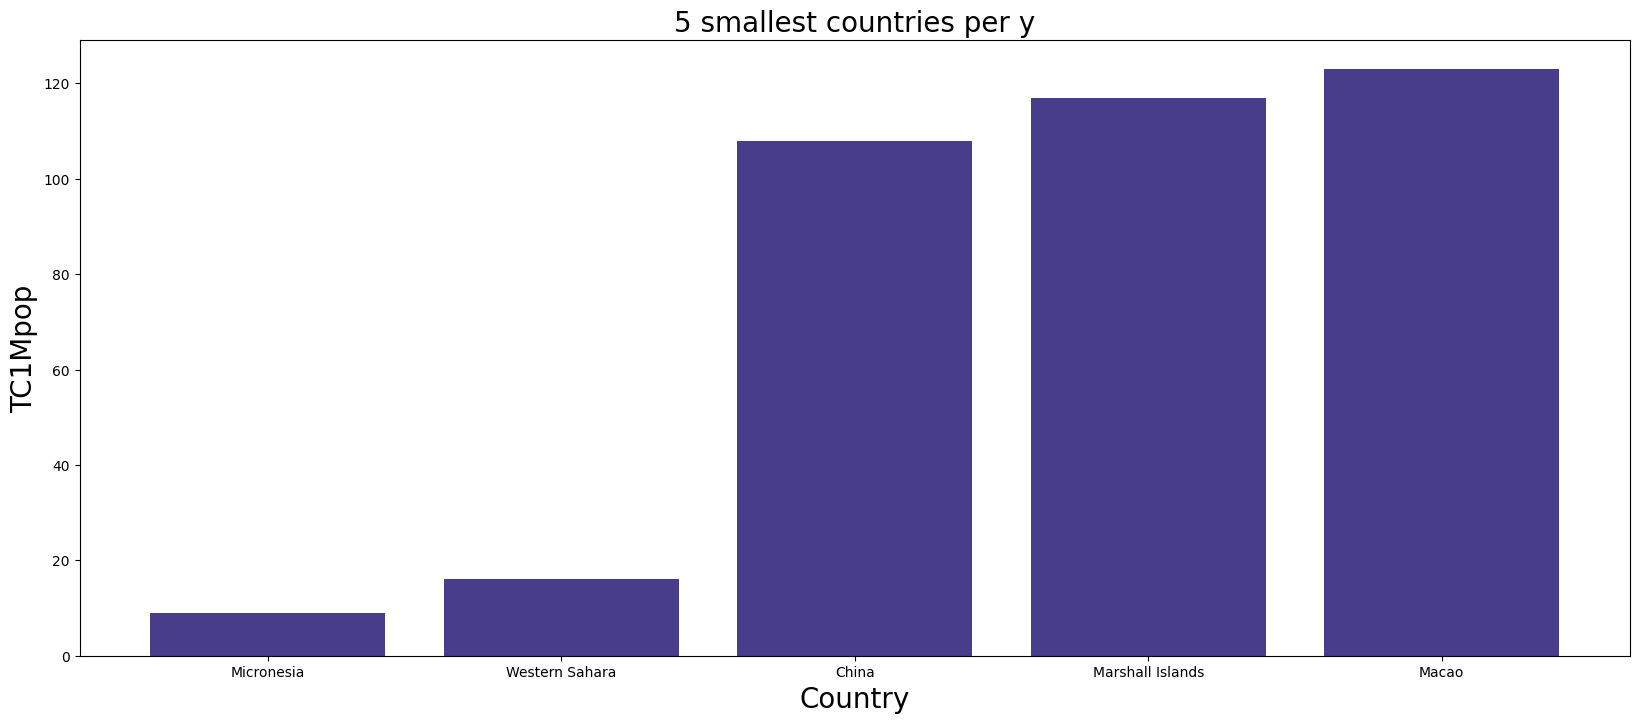

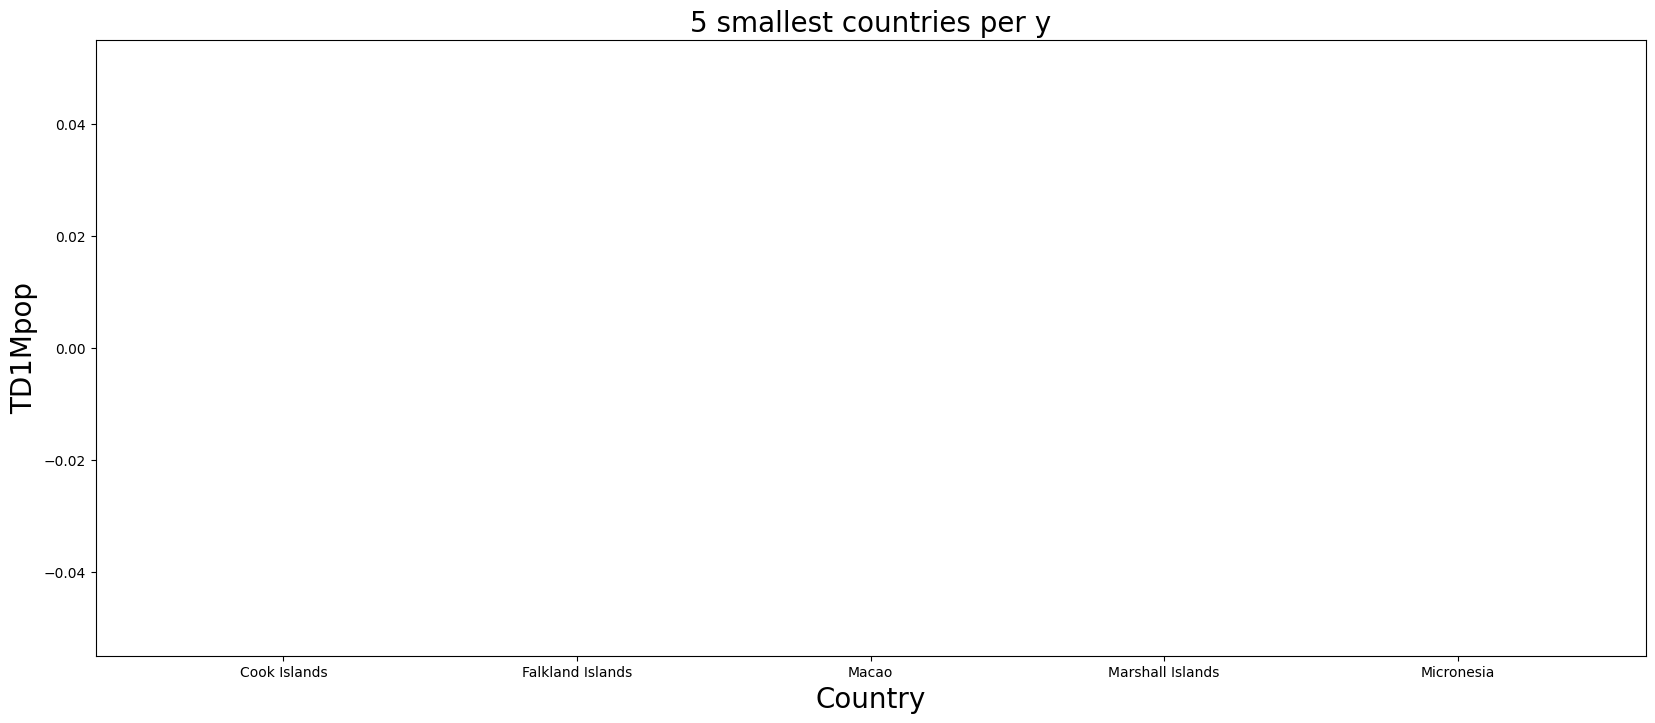

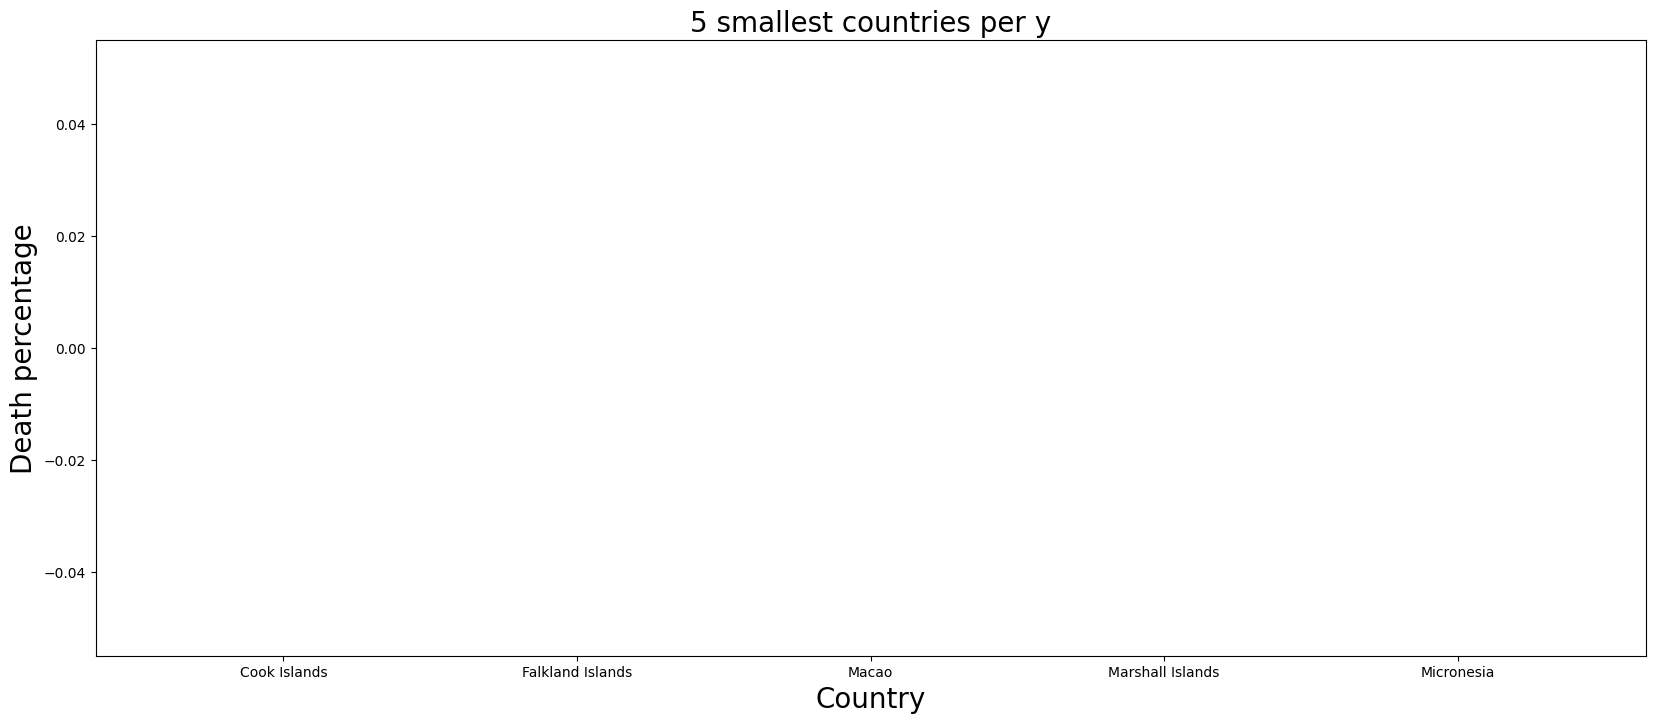

In [18]:
for column in columns:
  top5 = train.nsmallest(5,column)
  plt.figure(figsize=(20,8))
  plt.bar(top5['Country'], top5[column],color="#483D8B",alpha=1)
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("5 smallest countries per y", fontsize = 20)
  plt.show()

### All graphs show the state of affairs in the dwarf states, except for China. The Chinese authorities are doing everything possible to combat the spread of the virus. Since China had a lot of experience in combating this disease, a lockdown was immediately introduced, measures to disinfect city streets, mass testing and an effective healthcare system. Despite the Chinese origin of the virus, as well as the high population density, it was possible to prevent the spread of the virus in the country. There is only one conclusion - either China is doing well and reacting very quickly to the difficulties that have arisen, or they have been preparing for this pandemic for a long time.

In [19]:
Europe=train[train['Continent']=='Europe']

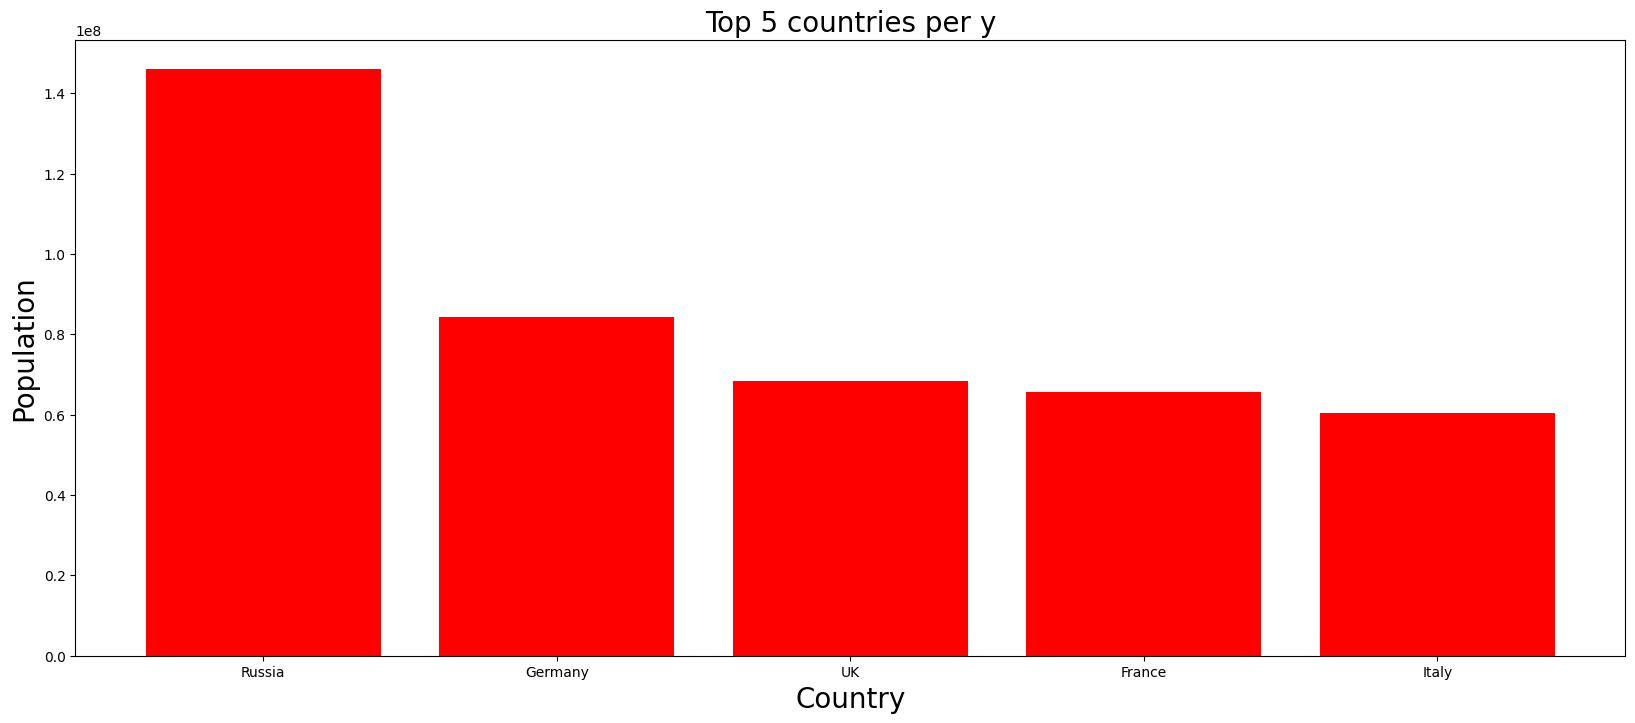

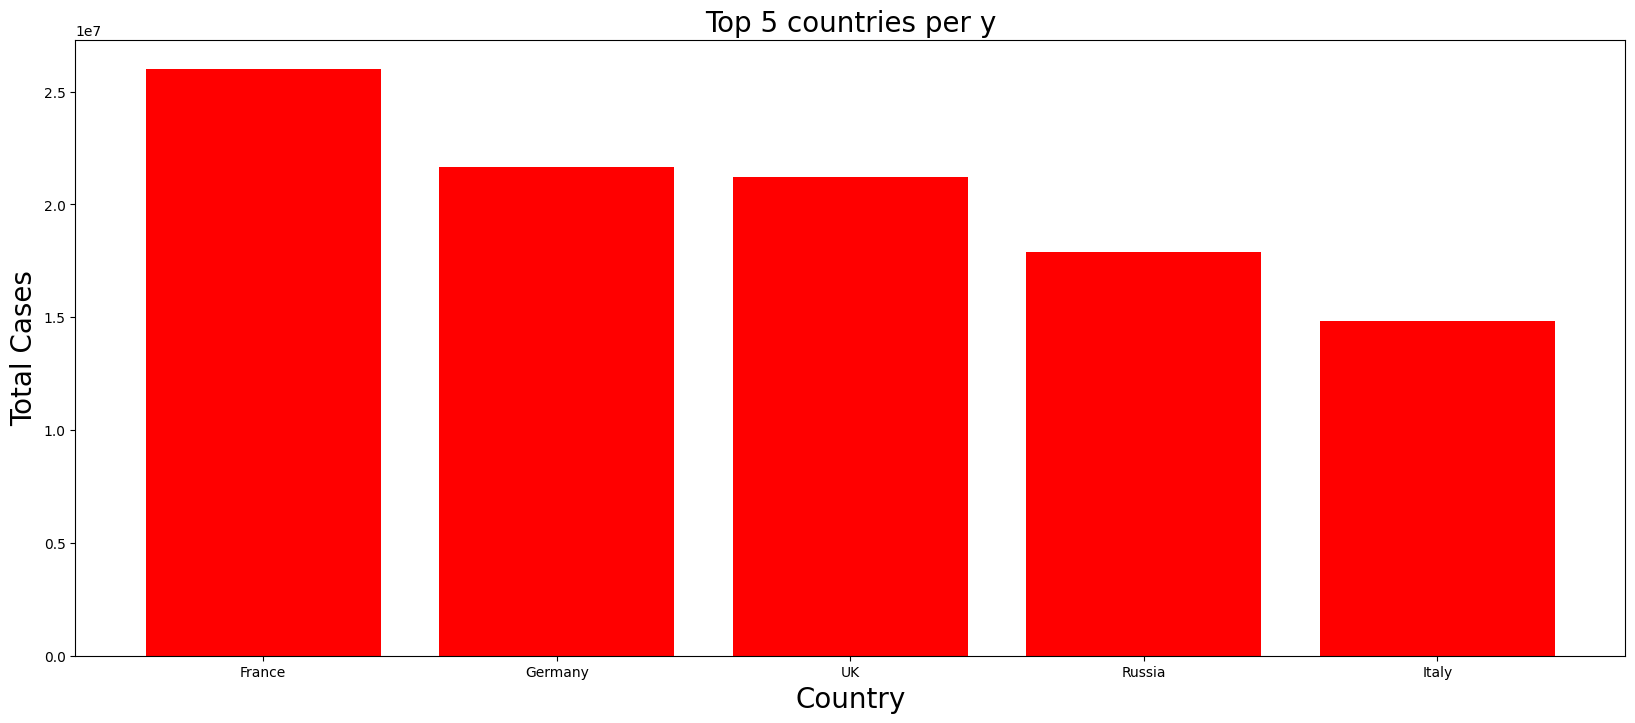

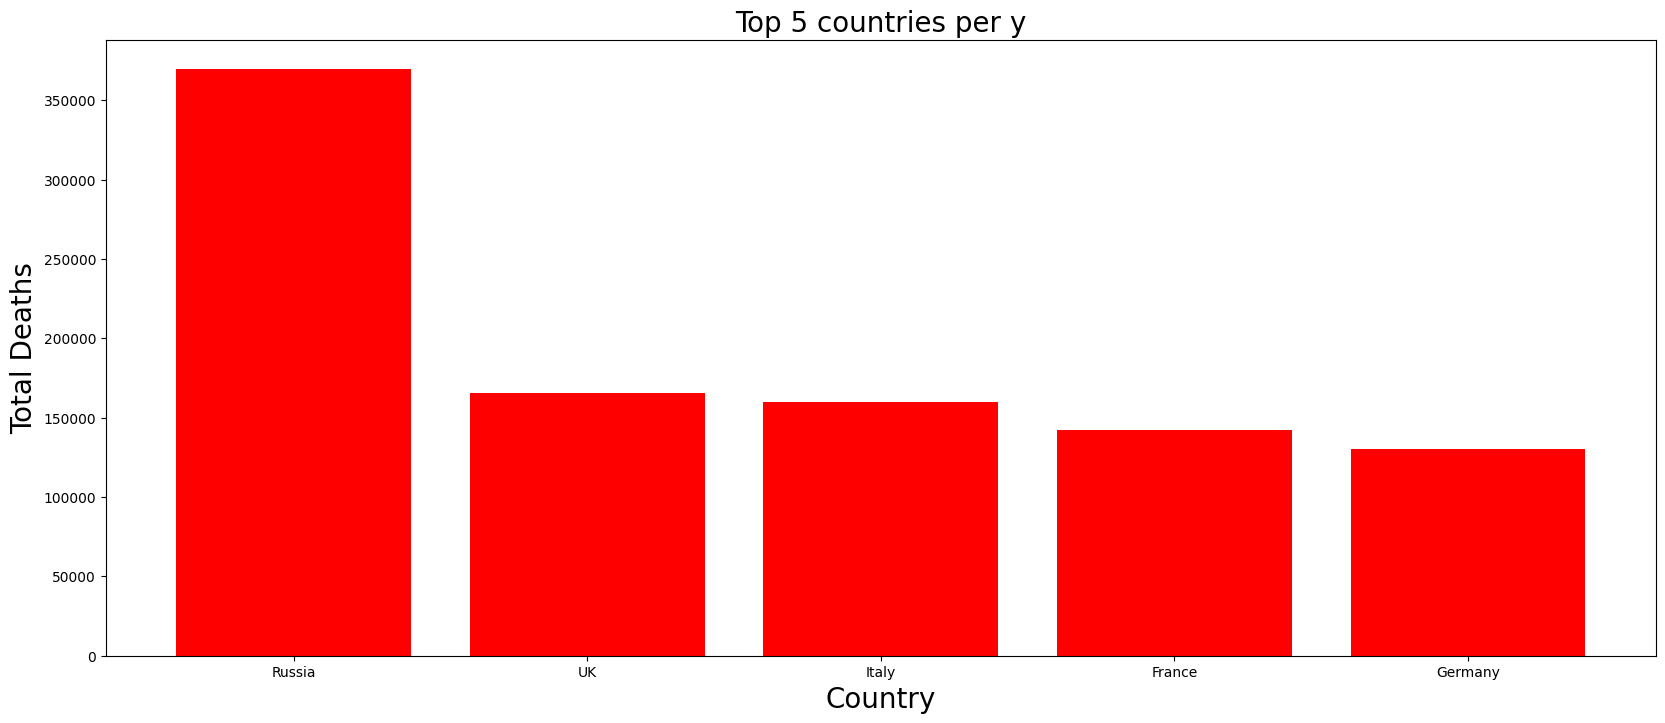

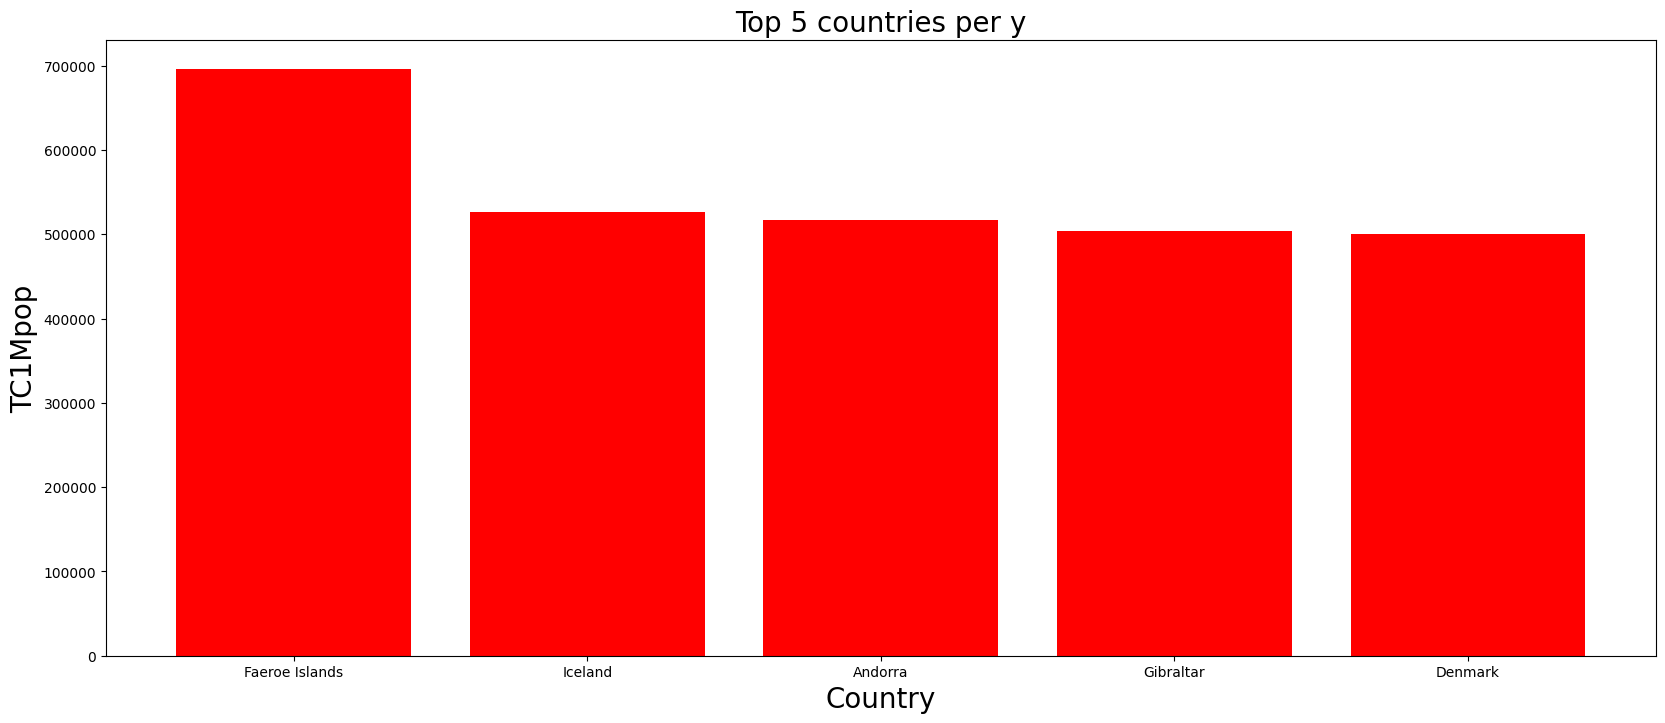

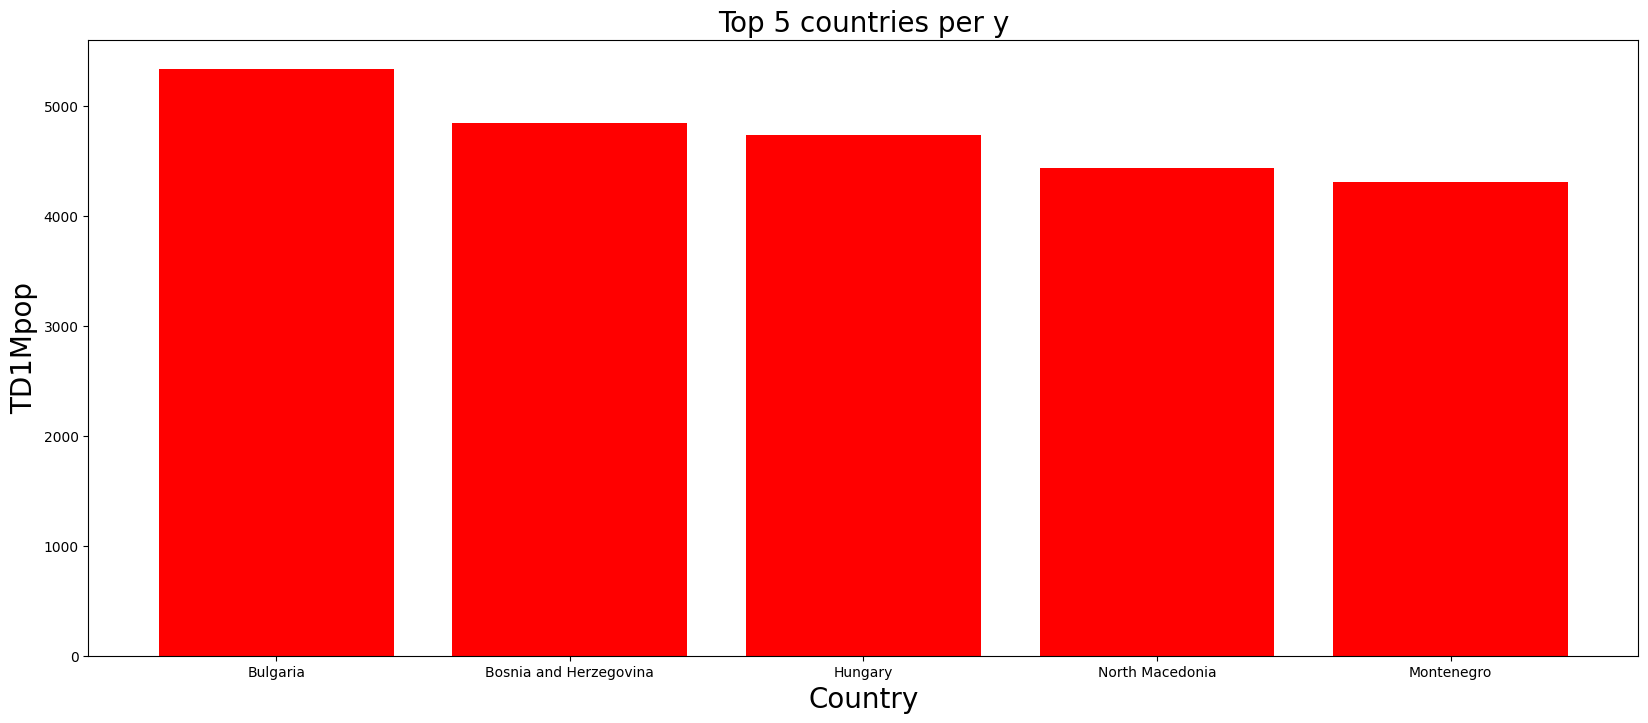

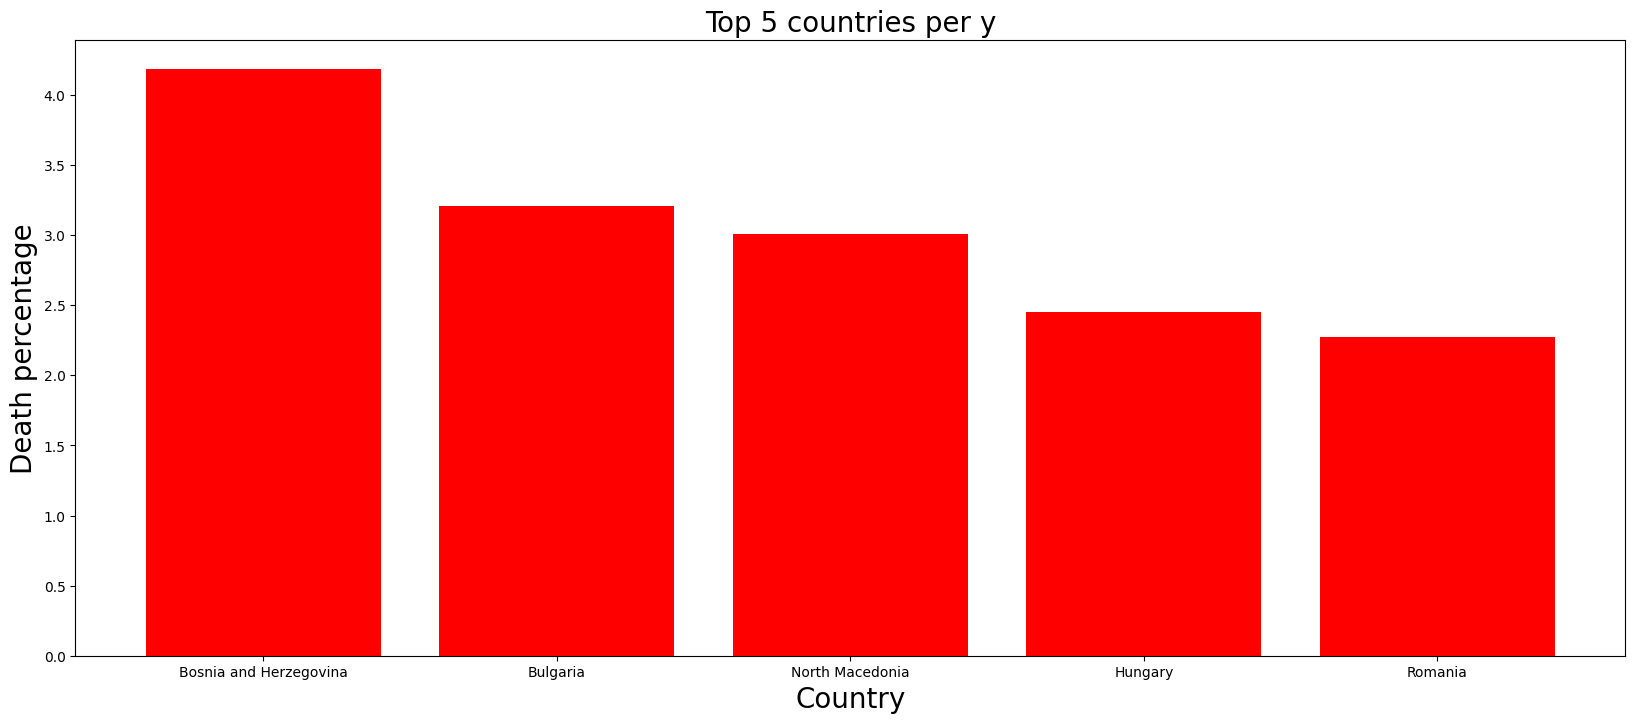

In [20]:
for column in columns:
  top5 = Europe.nlargest(5,column)
  plt.figure(figsize=(20,8))
  plt.bar(top5['Country'], top5[column],color="red",alpha=1)
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("Top 5 countries per y", fontsize = 20)
  plt.show()

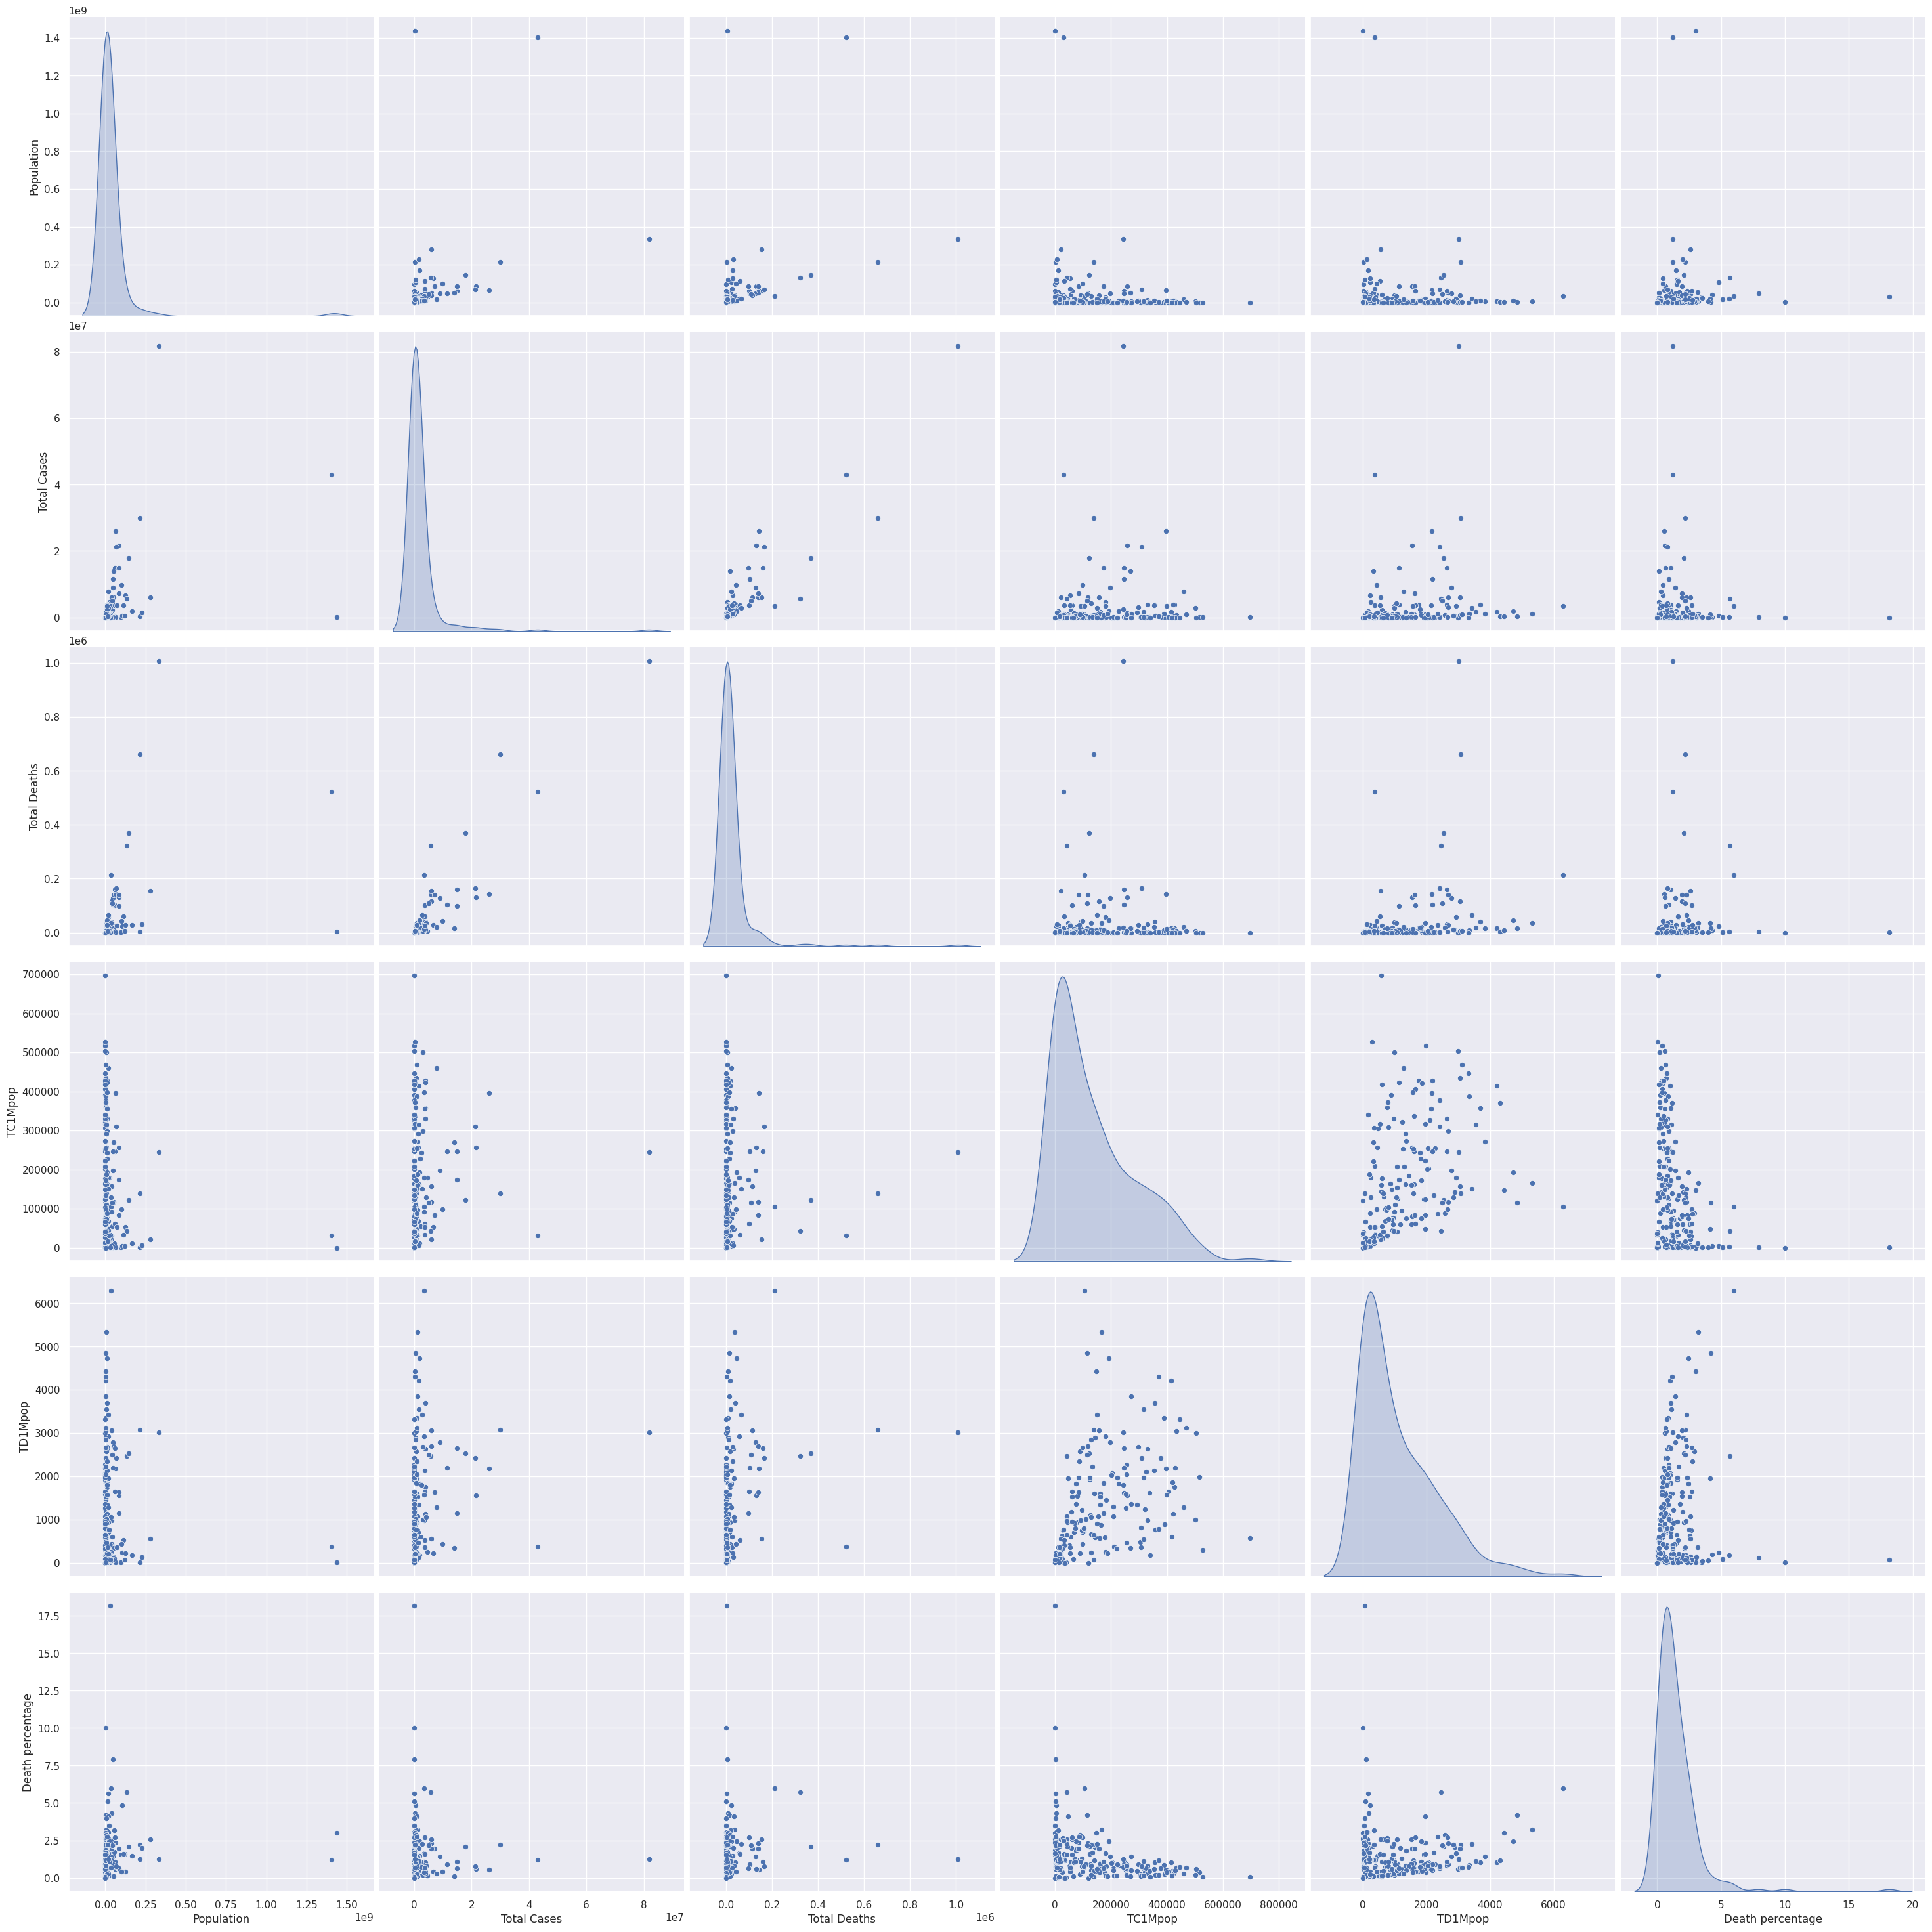

In [21]:
sns.set()
sns.pairplot(train[columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

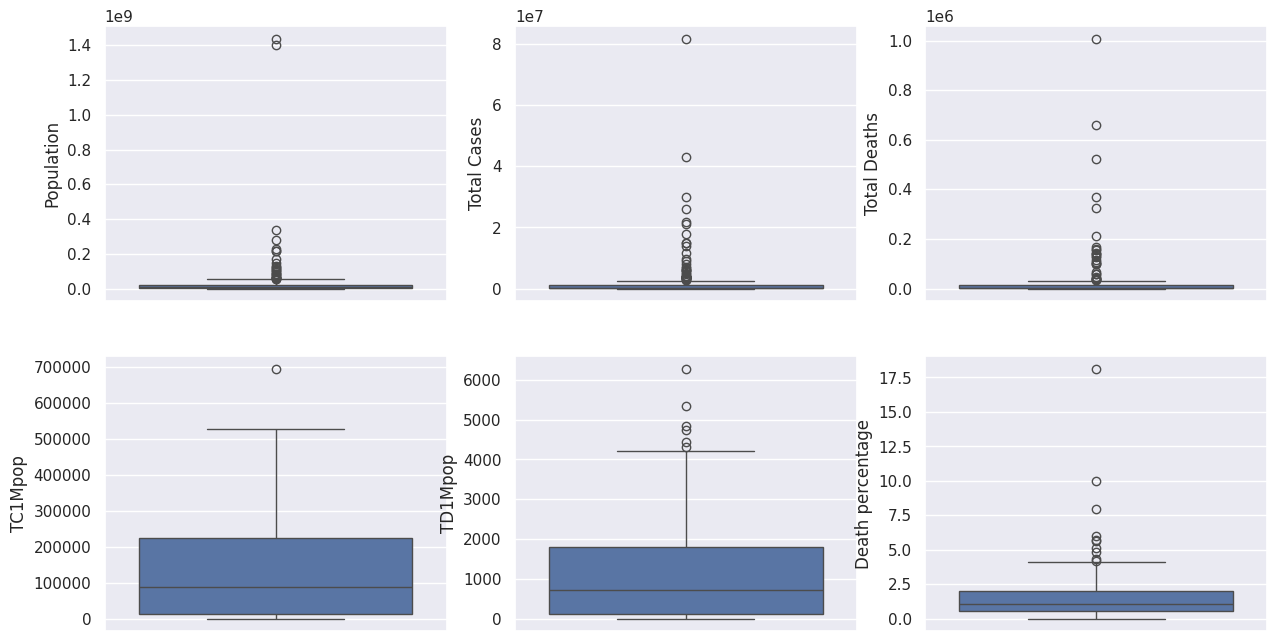

In [22]:
i=1
plt.figure(figsize=(15,25))
for feature in columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature])
    i+=1


In [23]:
correlation = train.corr()
print(correlation['TD1Mpop'].sort_values(ascending = False),'\n')

TD1Mpop             1.000000
TC1Mpop             0.508630
Total Deaths        0.289201
Total Cases         0.216272
Death percentage    0.061088
Population         -0.066485
Name: TD1Mpop, dtype: float64 



<ipython-input-23-4b052fe7fb2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr()


Index(['TD1Mpop', 'TC1Mpop', 'Total Deaths', 'Total Cases', 'Death percentage',
       'Population'],
      dtype='object')


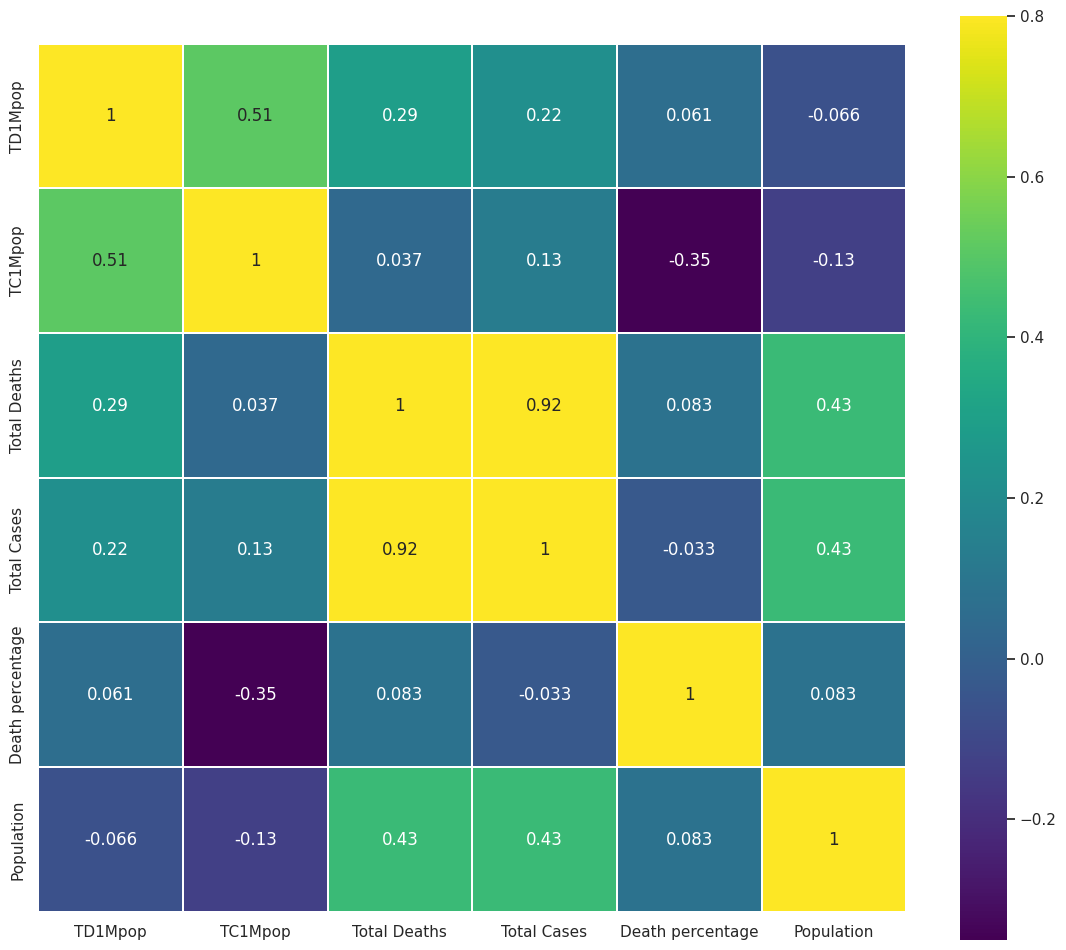

In [24]:
k= 10
cols = correlation.nlargest(k,'TD1Mpop')['TD1Mpop'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

### There is a high correlation between the number of cases and the number of deaths, which is generally logical.

In [25]:
train=train.drop(['Continent'],axis=1).set_index('Country')

In [26]:
train

,Population,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
Country,,,,,,
Afghanistan,40462186,177827,7671,4395,190,4.313743
Albania,2872296,273870,3492,95349,1216,1.275058
Algeria,45236699,265691,6874,5873,152,2.587216
Andorra,77481,40024,153,516565,1975,0.382271
Angola,34654212,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...
Wallis and Futuna,10894,454,7,41674,643,1.541850
Western Sahara,623031,10,1,16,2,10.000000
Yemen,30975258,11806,2143,381,69,18.151787


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()
names = train.columns
d = scaler.fit_transform(train)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Population,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
0,0.028111,0.002173,0.007608,0.006301,0.030226,0.237648
1,0.001995,0.003346,0.003464,0.136976,0.193446,0.070244
2,0.031429,0.003246,0.006818,0.008425,0.024181,0.142532
3,0.000053,0.000489,0.000152,0.742141,0.314190,0.021060
4,0.024076,0.001212,0.001885,0.004099,0.008750,0.105523


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

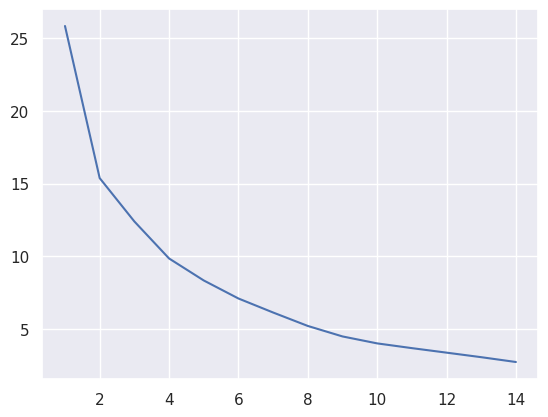

In [29]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit_predict(scaled_df)
    wcss.append(km.inertia_)
plt.plot(range(1,15),wcss)
plt.show()

### Since there is not much data, there will be no outlier processing, but I want to show how you can quickly process outliers using the LocalOutlierFactor method. By changing the hyperparameters of the LocalOutlierFactor method, you can control the number of outliers to be removed.

In [30]:
from sklearn.neighbors import LocalOutlierFactor

In [31]:
clf = LocalOutlierFactor(n_neighbors=10, contamination='auto')
y_pred = clf.fit_predict(train)

In [32]:
train['Out']=y_pred

In [33]:
Out=train[train['Out']!=1]

In [34]:
Out.shape

(11, 7)

In [35]:
train=train.drop('Out',axis=1)

# Conclusion
### Since the initial outbreak of COVID-19, hoaxes and misinformation regarding the origin, extent, prevention, treatment, and other aspects of the disease have quickly spread online. Disinformation can cost lives. Lack of sufficient levels of confidence and reliable information can negatively affect diagnosis, and immunization campaigns in the population may not achieve their goals, and the virus will continue to circulate. Also during the pandemic, the problem of covid dissidence arose. Covid dissidents are people who do not believe in the existence of the virus or greatly downplay the significance of the problem. Such people may not wear masks, may not observe social distancing or government guidelines, and may not seek immediate medical attention if they become ill. There are cases when such people subsequently lay in intensive care or were near death, but could not change anything.The dissemination of accurate and reliable information through social media platforms is crucial in combating the infodemic, misinformation and rumors. In a joint statement, WHO, the UN, UNICEF and others called on UN member countries to develop and implement plans to counter the spread of the infodemic by disseminating accurate information based on science and evidence in a timely manner to all communities, especially to people at risk, and by combating disinformation while respecting freedom of expression.